<a href="https://colab.research.google.com/github/Whaleman0423/-Python-book-practice/blob/main/tfKs_ch1_%E5%88%9D%E6%8E%A2Keras20211020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from tensorflow.keras.models import Sequential # 序列式模型類別
from tensorflow.keras.layers import Dense # 密集層列別

In [165]:
model = Sequential() # 建立序列模型物件

model.add(Dense(4, activation="relu", input_dim=3)) # 加入第 1 層，第 1 層要加 input_dim
model.add(Dense(1, activation="sigmoid"))  # 加入第 2 層

model.compile(                  # 以指定的參數編譯模型
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
                      )


###### model = Sequential() 建立序列模型物件，並指定給 model，此時 model 就是一個神經網路了，但內容是空的。

##### Mnist

In [166]:
from tensorflow.keras.datasets import mnist
# mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

######第一次載入資料集，會由網路將資料下載並儲存到本機使用者資料夾

In [167]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [168]:
train_labels[0]

5

In [169]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


###### 只秀一張圖

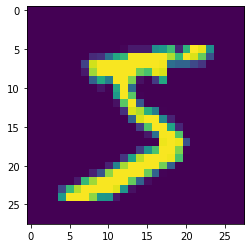

In [170]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

######隨機秀一張圖

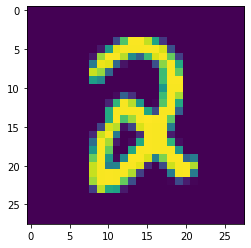

In [171]:
import random 
c = random.randint(0, 59999)
plt.imshow(train_images[c])

######連續秀一列圖

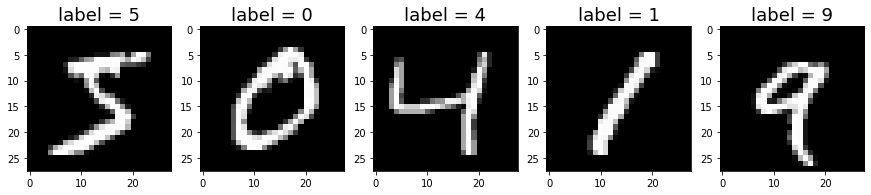

In [172]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)  # 設定圖形的寬和高(英吋)
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)  # 設定 1 * 5 的子圖表，目前要畫 1 + i 個
  ax.imshow(train_images[i], cmap="gray")  # 顯示灰階圖片(黑底白字)
  ax.set_title("label = " + str(train_labels[i]), fontsize=18)  # 設定標題
plt.show()  # 將圖形顯示出來

######隨機秀5張圖

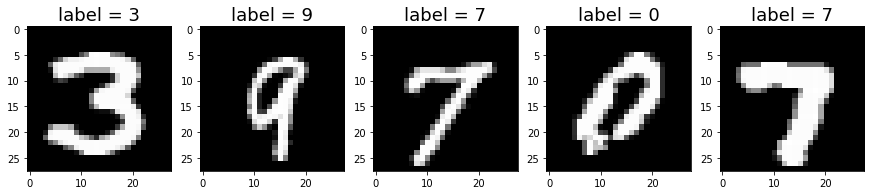

In [173]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
c = random.sample(range(0, 60000), 5)  # 隨機取得 1 ～ 60000中的 5 個字
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)
  ax.imshow(train_images[c[i]], cmap="gray")
  ax.set_title("label = " + str(train_labels[c[i]]), fontsize=18)
plt.show()

#####白底黑字，

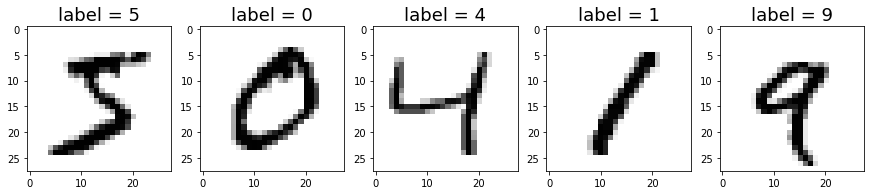

In [174]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
for i in range(5):
  axis = plt.subplot(1, 5, 1+i)
  axis.imshow(train_images[i], cmap="binary")
  axis.set_title("label = " + str(train_labels[i]), fontsize=18)
plt.show()

### 資料預處理(preprocess)

###### 1. 把 2D 轉成 1D
###### 2. 將像素值由 0～255 ，轉成 0～1

In [175]:
# 訓練集
x_train = train_images.reshape((60000, 28 * 28))  # 將 (60000, 28, 28) 轉換成 (60000, 784)
x_train = x_train.astype('float32') / 255.0  # 再將 0～255 的像素值轉換成 0～1的浮點數

# 測試集
x_test = test_images.reshape((10000, 28 * 28))   # 將10000筆測試集採同樣方式的轉換
x_test = x_test.astype("float32") / 255.0

###### 轉換後，再看一次shape

In [176]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


###### 標籤資料的轉換
###### 例如 : 將答案 2 轉換為 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
###### => One-hot-encoding

In [177]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)  # 將訓練標籤和測試答案做 One-hot-encoding
y_test = to_categorical(test_labels)

###### 做完 One-hot-encoding 看一下標籤的形式

In [178]:
print(train_labels[0])
print(y_train[0])
# 看一下 標籤的 shape
print(y_train.shape) # 原本是(60000,)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


### 預處理好樣本和標籤後，即可著手建立神經網路模型

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))
model.compile(
          optimizer="rmsprop",          # 指定優化器
          loss='categorical_crossentropy',    # 指定損失函數
          metrics=["acc"]             # 指定評量準則 
        )


#### 建好模型後，呼叫模型的 summary()，來檢視模型的摘要資訊。

In [180]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 用準備好的 x_train(訓練樣本) 和 y_train(標籤) ， fit() 訓練模型

In [181]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2548 - acc: 0.9270
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1039 - acc: 0.9696
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - acc: 0.9798
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - acc: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - acc: 0.9889


####評估模型成效及修正  evaluate()

In [182]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("對測試資料集的準確率 : ", test_acc)
print("對測試資料集的lose : ", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - acc: 0.9814
對測試資料集的準確率 :  0.9814000129699707
對測試資料集的lose :  0.06753388792276382


In [183]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - acc: 0.9814


[0.06753388792276382, 0.9814000129699707]

#### 用模型預測答案

In [184]:
predict = model.predict(x_test)  # predict() 會回傳預測的結果
predict.round(1)  # 顯示四捨五入到小數一位的預測結果

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###### 想直接看預測結果，用 predict_classes()

In [185]:
# predict = model.predict_classes(x_test)  # 不行用了
import numpy as np
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)
print("預測結果: ", predict)
print("正確標籤: ", test_labels)

預測結果:  [7 2 1 ... 4 5 6]
正確標籤:  [7 2 1 ... 4 5 6]


##### 畫出測試圖片並標示預測結果與標準答案

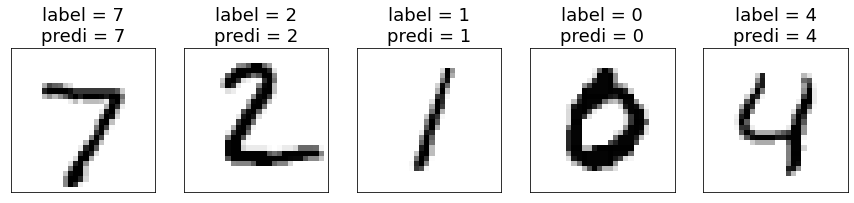

In [201]:
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)
plt.gcf().set_size_inches(15, 4)
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)
  ax.imshow(test_images[i], cmap="binary")
  ax.set_title("label = " + str(test_labels[i]) + '\npredi = ' + str(predict[i]), fontsize=18)    
  ax.set_xticks([]); ax.set_yticks([])  
plt.show()

###### 顯示錯誤

In [ ]:
predict = model.predict(x_test)  
predict = np.argmax(predict,axis=1)

errors = []
for i in range(10000):
  if predict[i] != test_labels[i]:
    errors.append(i)
plt.gcf().set_size_inches(13, 4)
plt.figure(figsize=(50,80))

for i in range(len(errors)):
  ax = plt.subplot(20, 10, 1+i)
  ax.imshow(test_images[errors[i]], cmap="binary")
  ax.set_title("label = " +str(test_labels[errors[i]]) + "\npredi : " + str(predict[errors[i]]), fontsize=20)
  ax.set_xticks([]); ax.set_yticks([])
plt.show()